### Regresi Linear Sederhana

,jam_belajar,nilai_ujian
0,2.0,57
1,2.0,60
2,2.5,66
3,4.0,73
4,5.0,76
5,5.0,79
6,7.0,81
7,8.0,90
8,8.0,95
9,9.0,100


<AxesSubplot:title={'center':'Nilai Vs Lama Belajar'}, xlabel='jam_belajar', ylabel='nilai_ujian'>

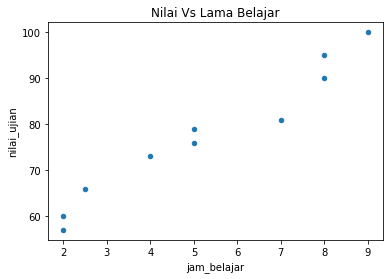

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

nilai = {
    "jam_belajar" : [2,2,2.5,4,5,5,7,8,8,9],
    "nilai_ujian" : [57,60,66,73,76,79,81,90,95,100]
}

# Data Training
df_nilai = pd.DataFrame(nilai)
display(df_nilai)

# Scatter Plot
df_nilai.plot(kind='scatter', x='jam_belajar', y='nilai_ujian', title='Nilai Vs Lama Belajar')

### Training Data dan Prediksi Nilai

In [24]:
import numpy as np
from sklearn import linear_model


# Variabel bebas dan variabel target
X = df_nilai[['jam_belajar']]
y = df_nilai['nilai_ujian']

# Membuat objek regresi linear
regr_s = linear_model.LinearRegression()

# Tranining model menggunakan data latih
regr_s.fit(X.values, y)

# Nilai koefisien dan nilai intercept
print("Koefisien : ", regr_s.coef_)
print("Intercept : ", regr_s.intercept_)
print("Model regresi : y= {} + {}x".format(regr_s.intercept_,regr_s.coef_[0]))

# Memprediksi dengan satu data uji
jam_belajar_uji = 3 
nilai_ujian_pred = regr_s.predict([[jam_belajar_uji]])

print("\nPrediksi nilai ujian dengan jam belajar {} jam : {}".format(jam_belajar_uji,nilai_ujian_pred[0]))

# Memprediksi lebih dari satu data uji
jam_belajar_uji = pd.DataFrame(np.array([[3],[3.5],[6]]), columns=['jam_belajar'])
nilai_ujian_pred = regr_s.predict(jam_belajar_uji.values)

# Hasil prediksi
print("\nHasil Prediksi 3 data uji")
jam_belajar_uji['prediksi_nilai_ujian'] = nilai_ujian_pred
print(jam_belajar_uji)

Koefisien :  [5.32934132]
Intercept :  49.72095808383234
Model regresi : y= 49.72095808383234 + 5.329341317365269x

Prediksi nilai ujian dengan jam belajar 3 jam : 65.70898203592814

Hasil Prediksi 3 data uji
   jam_belajar  prediksi_nilai_ujian
0          3.0             65.708982
1          3.5             68.373653
2          6.0             81.697006


### Membuat Regression Plot

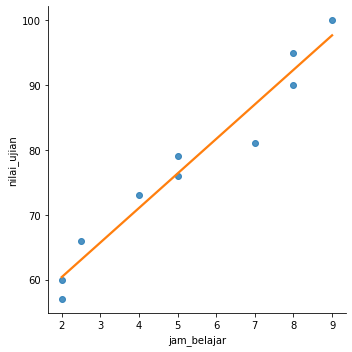

In [25]:
import seaborn as sns

#Regression Plot
sns.lmplot(x="jam_belajar", y="nilai_ujian", data=df_nilai, line_kws={"color": "C1"}, ci=None)

### Regresi Linear Berganda

In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model

# Load dataset rumah jaksel
df_rumah = pd.read_csv('HARGA RUMAH JAKSEL.csv')
display(df_rumah)

# Training Data
rumah_X_train = df_rumah.loc[:200, ('LT','LB','GARASI')]
rumah_X_train = pd.get_dummies(rumah_X_train, prefix='GRS',columns=['GARASI'])
rumah_y_train = df_rumah.loc[:200,'HARGA']

# Membuat objek regresi linier
regr_b = linear_model.LinearRegression()

# Training model dengan data latih
regr_b.fit(rumah_X_train.values, rumah_y_train)

# Nilai koefisien dan nilai intercept
print("Koefisien : ", regr_b.coef_)
print("Intercept : ", regr_b.intercept_)

# Prediksi harga sebuah rumah dengan LT:550, LB:700, Garasi : ADA
rumah_x_test1 = np.array([[550,700,1,0]])
harga_rumah_pred = regr_b.predict(rumah_x_test1)
print("\nPrediksi rumah LT=550, LB=700, Garasi=ADA :", harga_rumah_pred, "M")

# Prediksi harga beberapa rumah
rumah_X_test2 = df_rumah.loc[201:205, ('LT','LB','GARASI')]
rumah_X_test2 = pd.get_dummies(rumah_X_test2, prefix='GRS',columns=['GARASI'])
harga_rumah_pred = regr_b.predict(rumah_X_test2.values)

# Hasil Prediksi dalam tabel
print("\nHasil Prediksi data test 2")
rumah_Y_test2 = df_rumah.loc[201:205, 'HARGA']
rumah_test2 = pd.concat([rumah_X_test2, rumah_Y_test2], axis=1)
rumah_test2['HARGA_PRED'] = harga_rumah_pred
print(rumah_test2)

,LT,LB,JKT,JKM,GARASI,HARGA
0,1100,700,5,6,ADA,28.00
1,824,800,4,4,ADA,19.00
2,500,400,4,3,ADA,4.70
3,251,300,5,4,ADA,4.90
4,1340,575,4,5,ADA,28.00
...,...,...,...,...,...,...
996,488,550,6,5,ADA,16.00
997,209,270,4,4,ADA,4.50
998,692,400,4,3,TIDAK ADA,29.00
999,102,140,4,3,TIDAK ADA,1.70


Koefisien :  [ 0.014667    0.01652276  0.49559178 -0.49559178]
Intercept :  -0.3808873664996817

Prediksi rumah LT=550, LB=700, Garasi=ADA : [19.74748779] M

Hasil Prediksi data test 2
      LT   LB  GRS_ADA  GRS_TIDAK ADA  HARGA  HARGA_PRED
201  250  460        1              0   15.0   11.381925
202  518  450        1              0   17.5   15.147453
203  117  221        1              0    4.0    5.482274
204  350  350        0              1    8.0   10.039937
205  550  600        1              0   20.0   18.095211


### Latihan
1. Tuliskan persamaan regresi untuk kasus pada regresi linear berganda
2. Buat kode program untuk memprediksi harga rumah dengan kriteria berikut:
#### Rumah I
- LB : 100
- LT : 70
- GARASI : ADA
#### Rumah II
- LB : 100
- LT : 120
- GARASI : TIDAK

Berapa prediksi harga rumah untuk kedua rumah tersebut ?